In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [47]:
df_loan = pd.read_csv('C:/Users/NIKHIL MUKHI/Downloads/loan.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_loan.shape

(887379, 74)

In [9]:
# Dropping ID type features:
# 1. ID can falsely become the best predictor when it ideally should not be a driving factor for the outcome

df_loan = df_loan.drop(['id', 'member_id'], axis=1)

In [10]:
df_loan.shape

(887379, 72)

In [11]:
df_loan.dtypes

loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
term                 object
int_rate            float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 72, dtype: object

In [12]:
# Analysing the loan status variable for better understanding of the categories and the counts
df_loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [14]:
# Defining the Dependent Variable
df_loan['Target']=np.where(df_loan['loan_status'].isin(['Default','Charged Off','Does not meet the credit policy. Status:Charged Off']),1,0)

In [15]:
# Dropping the loan_status variable
df_loan = df_loan.drop(['loan_status'], axis=1)

In [16]:
# Calculating the default rate or the event rate for the data
df_loan['Target'].mean()

0.053221904056778443

In [17]:
df_loan.shape

(887379, 72)

In [19]:
# Analysing the missing values
df_loan.isnull().mean()

loan_amnt           0.000000
funded_amnt         0.000000
funded_amnt_inv     0.000000
term                0.000000
int_rate            0.000000
                      ...   
total_rev_hi_lim    0.079195
inq_fi              0.975916
total_cu_tl         0.975916
inq_last_12m        0.975916
Target              0.000000
Length: 72, dtype: float64

In [20]:
# Selecting all rows and those columns where missing values is <=25%
data=df_loan.loc[:,df_loan.isnull().mean()<=0.25]

In [21]:
data.shape

(887379, 50)

In [22]:
# Creating the dataset only with Dependent and Independent Variables
Y=data['Target']
X=data.drop(['Target'], axis=1)

In [23]:
char = X.select_dtypes(include='object')
num = X.select_dtypes(include='number')

In [25]:
char.shape

(887379, 19)

In [26]:
num.shape

(887379, 30)

In [24]:
num.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        4
dti                               0
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      502
total_acc                        29
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med      145
policy_code                       0
acc_now_delinq                   29
tot_coll_amt                

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1 = pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)

In [31]:
num_1.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
policy_code                   0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

In [32]:
# Filling the character values with '0'
char_1 = char.fillna(0)

In [33]:
char_1.isnull().mean()

term                   0.0
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
issue_d                0.0
pymnt_plan             0.0
url                    0.0
purpose                0.0
title                  0.0
zip_code               0.0
addr_state             0.0
earliest_cr_line       0.0
initial_list_status    0.0
last_pymnt_d           0.0
last_credit_pull_d     0.0
application_type       0.0
dtype: float64

In [36]:
# To avoid discrimation an enable fair lending, we are not using any title variables are risk identifier factors
char_1=char_1.drop(['url','zip_code','emp_title','issue_d','addr_state','title','sub_grade','last_credit_pull_d','earliest_cr_line','last_pymnt_d'],axis=1)

In [37]:
# Steps to regroup categorical features in order to achieve linear discrimination
char_1['purpose_1']=np.where(char_1['purpose'].isin(['other','medical','vacation','debt_consolidation','car','major_purchase','home_improvement','credit_card']),'others',char['purpose'])           
char_1['verified_1']=np.where(char_1['verification_status'].isin(['Source Verified','Verified']),'Verified',char_1['verification_status'])
char_1['home_own_1']=np.where(char_1['home_ownership'].isin(['OWN','MORTGAGE']),'OWN',
                     np.where(char_1['home_ownership'].isin(['RENT']),'RENT','OTHER'))
char_1['term_1']=np.where(char_1['term'].isin(['60 months']),'60','30')

In [38]:
char_2=char_1.loc[:,['purpose_1','verified_1','home_own_1','term_1','grade','emp_length','pymnt_plan','application_type']]

In [39]:
char_2.shape

(887379, 8)

In [40]:
from sklearn.preprocessing import
discrete = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index=num_1.index, columns=num_1.columns).add_suffix('_Rank')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 10 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 14 are removed. Consider decreasing the number of bins.
  'decreasing t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may cons

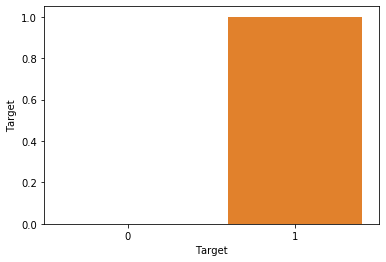

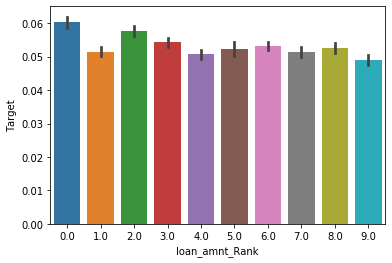

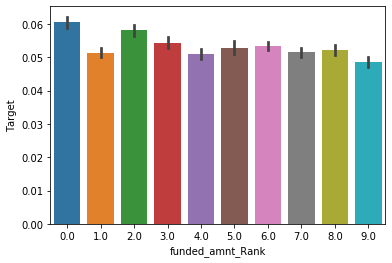

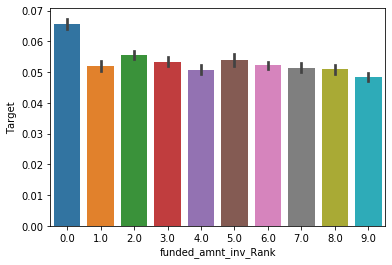

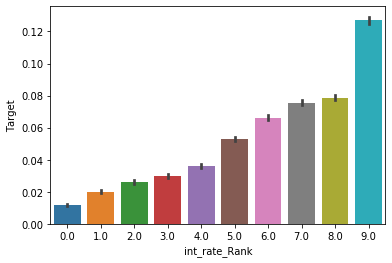

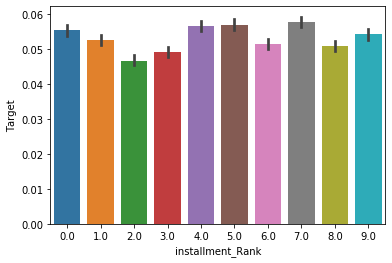

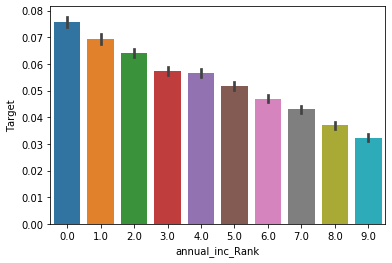

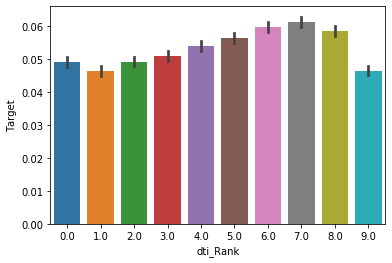

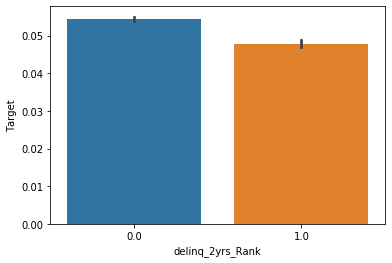

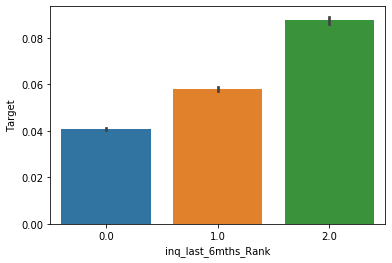

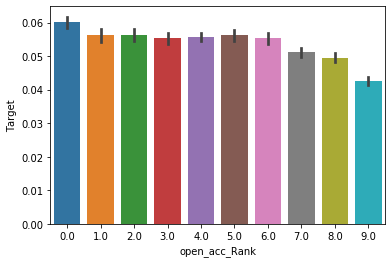

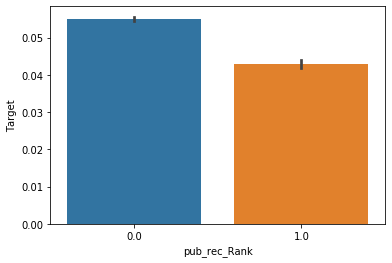

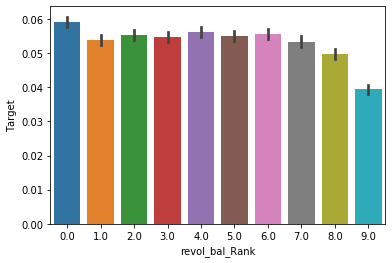

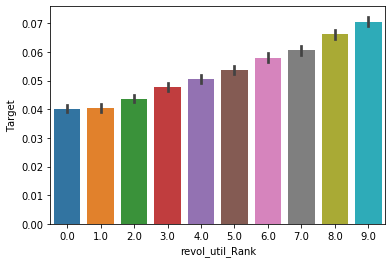

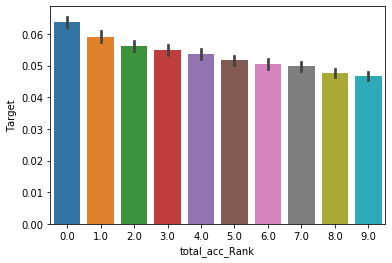

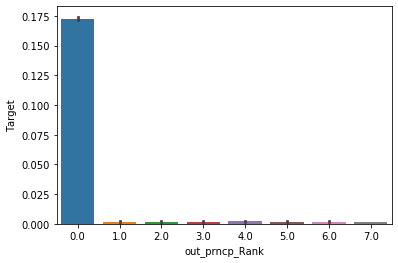

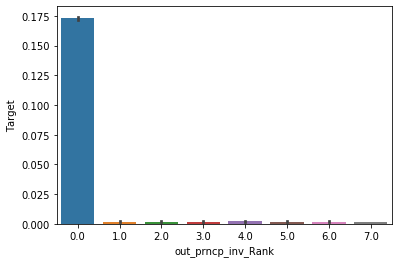

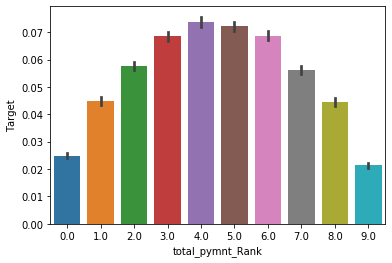

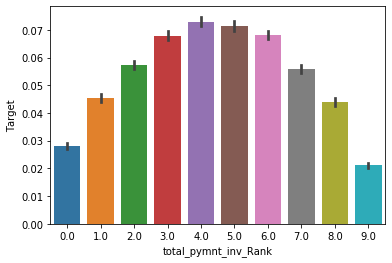

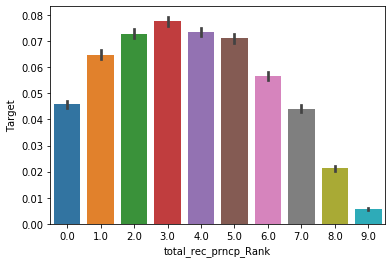

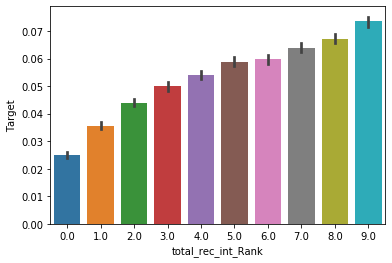

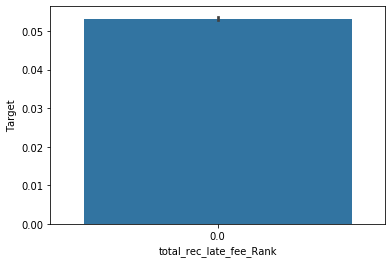

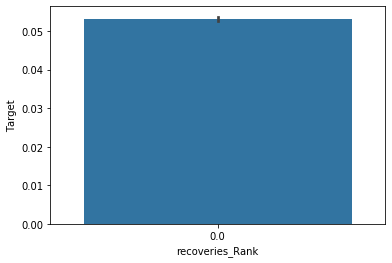

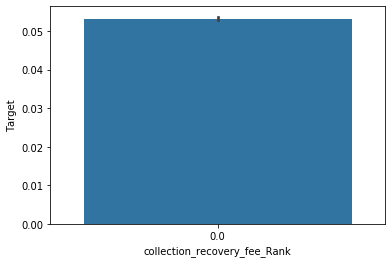

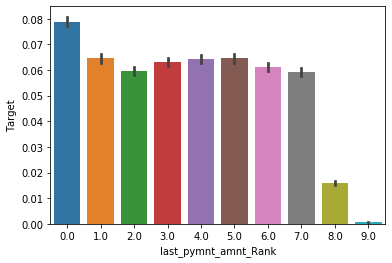

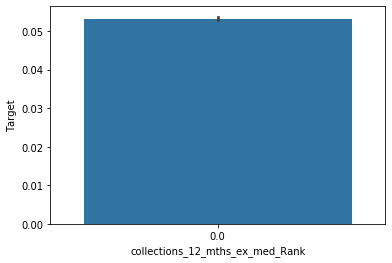

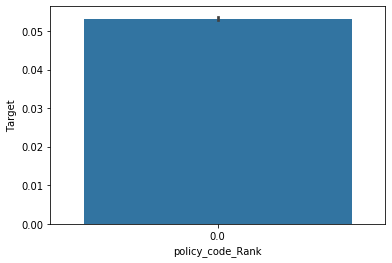

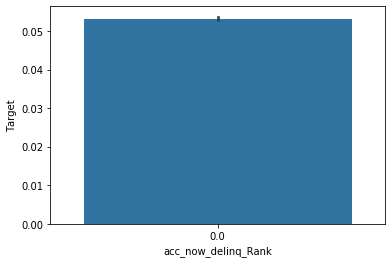

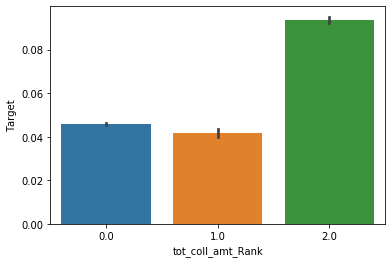

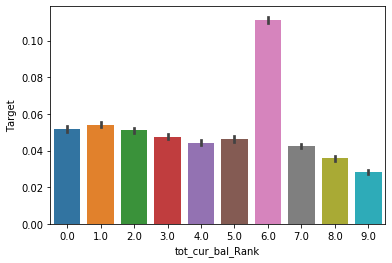

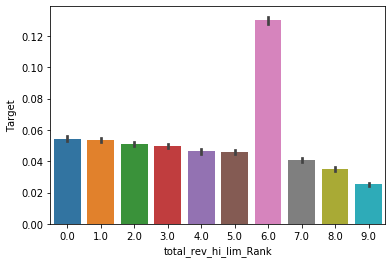

In [42]:
X_bin_combined = pd.concat([Y,num_binned], axis=1, join='inner')
from numpy import mean
for col in (X_bin_combined.columns):
    plt.figure()
    sns.barplot(x=col, y='Target', data=X_bin_combined, estimator=mean)
plt.show()    

In [43]:
# Select K Best for Numerical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=12)
X_new = selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [44]:
select_features_df_num.loc[:0]

,annual_inc,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
0,24000.0,13648.0,0.0,0.0,5861.071414,5831.78,5000.0,0.0,0.0,171.62,139458.189336,32068.620045


In [45]:
select_features_df_num.dtypes

annual_inc                 float64
revol_bal                  float64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
tot_cur_bal                float64
total_rev_hi_lim           float64
dtype: object

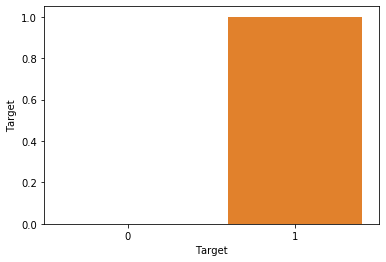

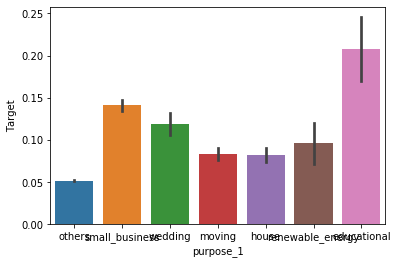

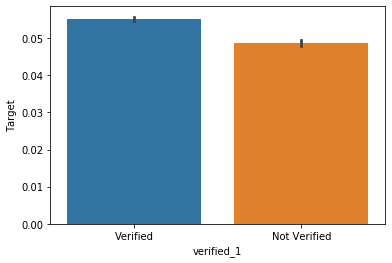

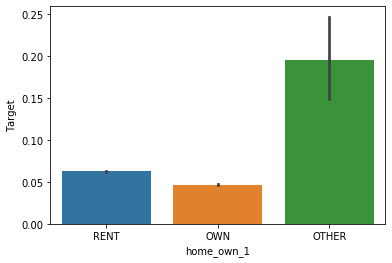

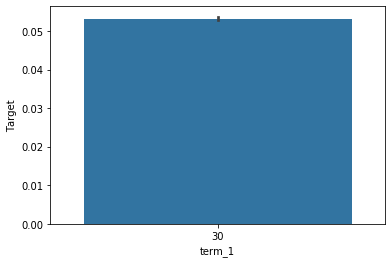

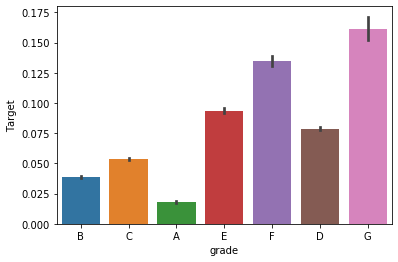

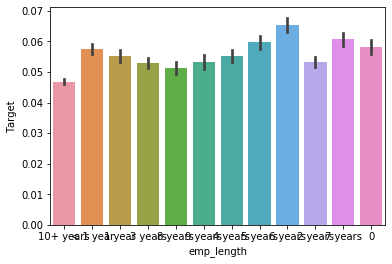

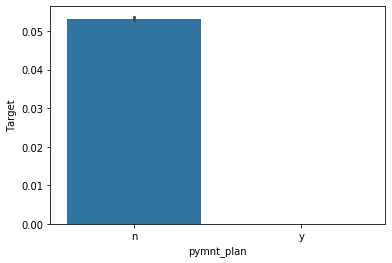

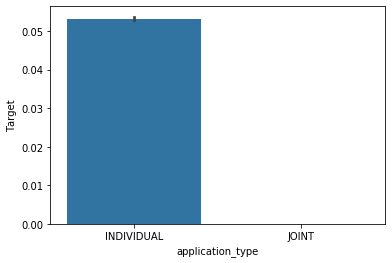

In [51]:
X_char_merged = pd.concat([Y,char_2], axis=1, join='inner')

from numpy import mean
for cols in (X_char_merged.columns):
    plt.figure()
    sns.barplot(x=cols, y='Target', data=X_char_merged, estimator=mean)
plt.show()

In [52]:
X_char_dum = pd.get_dummies(char_2,drop_first=True)

In [56]:
# Select K Best for categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector1 = SelectKBest(chi2, k=12)
X_new = selector1.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols1 = selector1.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols1]

In [57]:
select_features_df_char.loc[:0]

,purpose_1_moving,purpose_1_small_business,purpose_1_wedding,home_own_1_OWN,home_own_1_RENT,grade_B,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_6 years
0,0,0,0,0,1,1,0,0,0,0,1,0


In [58]:
select_features_df_char.dtypes

purpose_1_moving            uint8
purpose_1_small_business    uint8
purpose_1_wedding           uint8
home_own_1_OWN              uint8
home_own_1_RENT             uint8
grade_B                     uint8
grade_D                     uint8
grade_E                     uint8
grade_F                     uint8
grade_G                     uint8
emp_length_10+ years        uint8
emp_length_6 years          uint8
dtype: object

In [59]:
# Now bringing all the data together to build model
X_all = pd.concat([select_features_df_num,select_features_df_char], axis=1, join='inner')

In [60]:
# Splitting the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size=0.3)

In [61]:
y_train.mean()

0.05326765030225464

In [62]:
y_test.mean()

0.053115162989174125

In [66]:
# Building Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [71]:
# Model Valuation
y_pred = clf.predict(X_test)
y_pred_tree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [72]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [73]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))
print('Precision:', metrics.precision_score(y_test,y_pred))
print('Recall:', metrics.recall_score(y_test,y_pred))
print('F1 Score:', metrics.f1_score(y_test,y_pred))

Accuracy: 0.9927802444649793
Precision: 0.9643508665247795
Recall: 0.8972418670438472
F1 Score: 0.9295867526377491


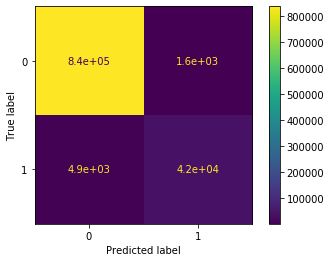

In [77]:
metrics.plot_confusion_matrix(clf,X_all,Y)

In [74]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_tree))
print('Precision:', metrics.precision_score(y_test,y_pred_tree))
print('Recall:', metrics.recall_score(y_test,y_pred_tree))
print('F1 Score:', metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.993407559331966
Precision: 0.937477922995408
Recall: 0.9384724186704385
F1 Score: 0.9379749072274254


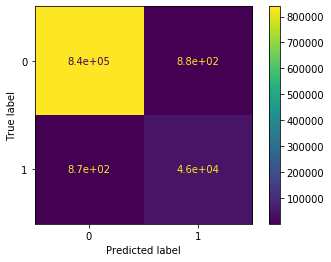

In [78]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [75]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred_rf))
print('Precision:', metrics.precision_score(y_test,y_pred_rf))
print('Recall:', metrics.recall_score(y_test,y_pred_rf))
print('F1 Score:', metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9956989489658695
Precision: 0.9886440550500113
Recall: 0.9297029702970298
F1 Score: 0.9582680322192659


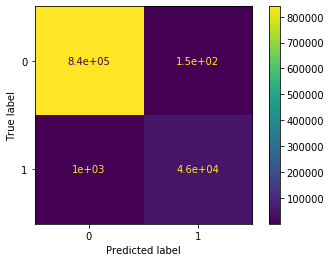

In [79]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [ ]:
# Conclusion : From the above model building it's quite evident that "Random Forest Algo" giving us the best "F1 Score" so basis on this we can move ahead with following algo for above Credit Scoring Lending data. Although, we can try different classifier algorithms as well in order to make sure..